# *Example of plotting PSP data*
***

Import the needed libraries

In [1]:
import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import heliopy
import heliopy.data.psp
import astropy.constants

Define the start and end times of the period of interest

In [3]:
start_time = datetime.datetime(2018, 11, 11)
end_time = datetime.datetime(2018, 11, 13)

Download *FIELDS* data

In [4]:
%%capture
field = heliopy.data.psp.fields_mag_rtn_1min(start_time, end_time);

Download *SWEAP* data

In [5]:
%%capture
plasma = heliopy.data.psp.sweap_spc_l3(start_time, end_time)

Plot some of the data

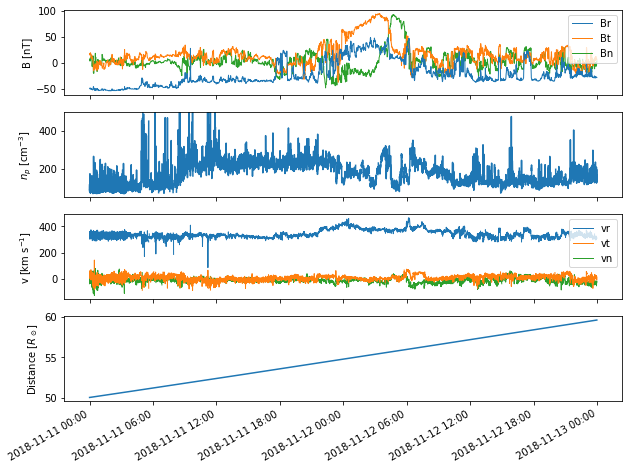

In [6]:
fig, axs = plt.subplots(figsize=(10, 8), nrows=4, sharex=True)

# Magnetic field components
for comp, label in enumerate(['Br', 'Bt', 'Bn']):
    axs[0].plot(field.index, field.quantity(f'psp_fld_l2_mag_RTN_1min_{comp}'),
                linewidth=1, zorder=-comp, label=label)

axs[0].set_ylabel('B [nT]')
axs[0].legend()
    
# Proton density
axs[1].plot(plasma.index, plasma.quantity('np_fit'))
axs[1].set_ylim(50.0, 500)
axs[1].set_ylabel('$n_p$ [cm$^{-3}$]')

# Proton bulk velocity components
for comp, label in enumerate(['vr', 'vt', 'vn']):
    axs[2].plot(plasma.index, plasma.quantity(f'vp_fit_RTN_{comp}'),
                linewidth=1, zorder=-comp, label=label)

axs[2].legend()
axs[2].set_ylabel('v [km s$^{-1}$]')

# PSP distance
dsqr = 0.0
for comp in range(3):
    dsqr += plasma.quantity(f'sc_pos_HCI_{comp}')**2

axs[3].plot(plasma.index, 1e3*np.sqrt(dsqr)/astropy.constants.R_sun.value);
axs[3].set_ylabel('Distance [$R_\odot$]')

fig.autofmt_xdate()
axs[3].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M'))

***